In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ipldf=pd.read_csv('all_matches.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ipldf.head

In [ ]:
ipldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                194354 non-null  int64  
 1   season                  194354 non-null  object 
 2   start_date              194354 non-null  object 
 3   venue                   194354 non-null  object 
 4   innings                 194354 non-null  int64  
 5   ball                    194354 non-null  float64
 6   batting_team            194354 non-null  object 
 7   bowling_team            194354 non-null  object 
 8   striker                 194354 non-null  object 
 9   non_striker             194354 non-null  object 
 10  bowler                  194354 non-null  object 
 11  runs_off_bat            194354 non-null  int64  
 12  extras                  194354 non-null  int64  
 13  wides                   5884 non-null    float64
 14  noballs             

#RUNS OF BATSMAN INSIDE POWERPLAY

In [ ]:
df=ipldf.query('ball<6.1 and innings==1')
#run details
pow_df_batsman=df.groupby(['match_id','striker']).agg({'runs_off_bat':'sum'})
pow_df_batsman=pow_df_batsman.reset_index()

pl_pow_df=pow_df_batsman.groupby(['striker']).agg({'runs_off_bat':'sum','match_id':'count'})
pl_pow_df=pl_pow_df.reset_index()
print(pl_pow_df.head())

#ball_details
ball_pow_df=df.groupby(['match_id','striker']).agg({'ball':'count'})
ball_pow_df=ball_pow_df.reset_index()

bl_pow_df=ball_pow_df.groupby(['striker']).agg({'ball':'sum','match_id':'count'})
bl_pow_df=bl_pow_df.reset_index()
print(bl_pow_df.head())

#merge
str_df=pd.merge(pl_pow_df, bl_pow_df, on='striker')
str_df=str_df.drop('match_id_y',axis=1)
str_df['strike_rate']=str_df['runs_off_bat']/str_df['ball']*100
prp_bat_pow=str_df.query('strike_rate>110 and match_id_x>=14')


       striker  runs_off_bat  match_id
0     A Chopra            27         5
1     A Mishra             1         1
2     A Mukund            14         1
3    A Symonds            58         9
4  AA Bilakhia            18         2
       striker  ball  match_id
0     A Chopra    41         5
1     A Mishra     5         1
2     A Mukund    16         1
3    A Symonds    63         9
4  AA Bilakhia    21         2


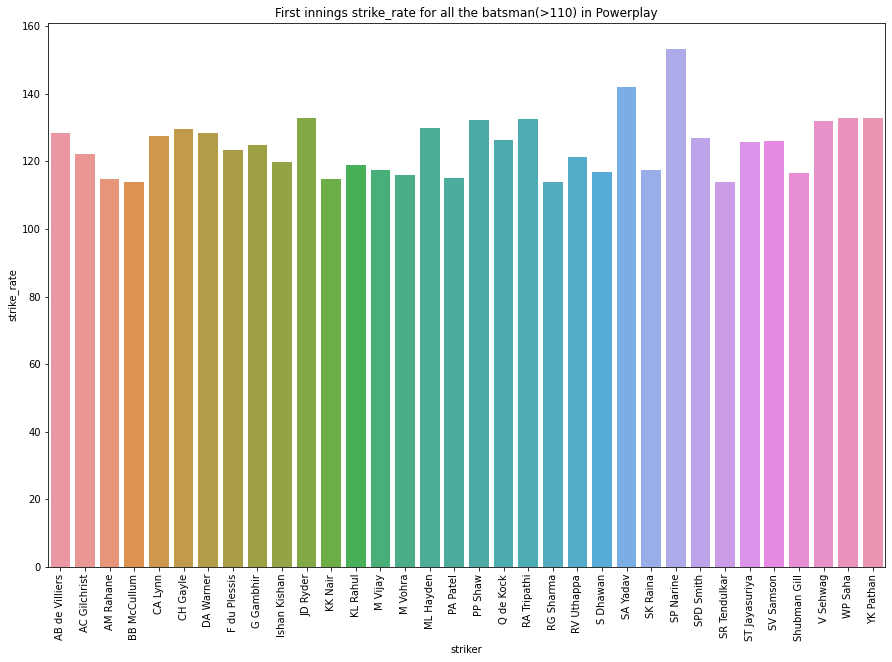

In [ ]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x = 'striker',
            y = 'strike_rate',
            data = prp_bat_pow,
            ci = 0)
ax.set_title('First innings strike_rate for all the batsman(>110) in Powerplay')
ax.set_xticklabels(prp_bat_pow['striker'], rotation=90)
# Show the plot
plt.show()

In [ ]:
df=ipldf.query('ball<6.1 and innings==2')
#run details
pow_df_batsman=df.groupby(['match_id','striker']).agg({'runs_off_bat':'sum'})
pow_df_batsman=pow_df_batsman.reset_index()

pl_pow_df=pow_df_batsman.groupby(['striker']).agg({'runs_off_bat':'sum','match_id':'count'})
pl_pow_df=pl_pow_df.reset_index()
print(pl_pow_df.head())

#ball_details
ball_pow_df=df.groupby(['match_id','striker']).agg({'ball':'count'})
ball_pow_df=ball_pow_df.reset_index()

bl_pow_df=ball_pow_df.groupby(['striker']).agg({'ball':'sum','match_id':'count'})
bl_pow_df=bl_pow_df.reset_index()
print(bl_pow_df.head())

#merge
str_df=pd.merge(pl_pow_df, bl_pow_df, on='striker')
str_df=str_df.drop('match_id_y',axis=1)
str_df['strike_rate']=str_df['runs_off_bat']/str_df['ball']*100
prp_bat_pow=str_df.query('strike_rate>110 and match_id_x>=14')


           striker  runs_off_bat  match_id
0   A Ashish Reddy             5         1
1       A Flintoff            14         1
2        A Symonds            14         6
3      AA Bilakhia             5         1
4  AA Jhunjhunwala            17         4
           striker  ball  match_id
0   A Ashish Reddy     7         1
1       A Flintoff    15         1
2        A Symonds    23         6
3      AA Bilakhia    12         1
4  AA Jhunjhunwala    27         4


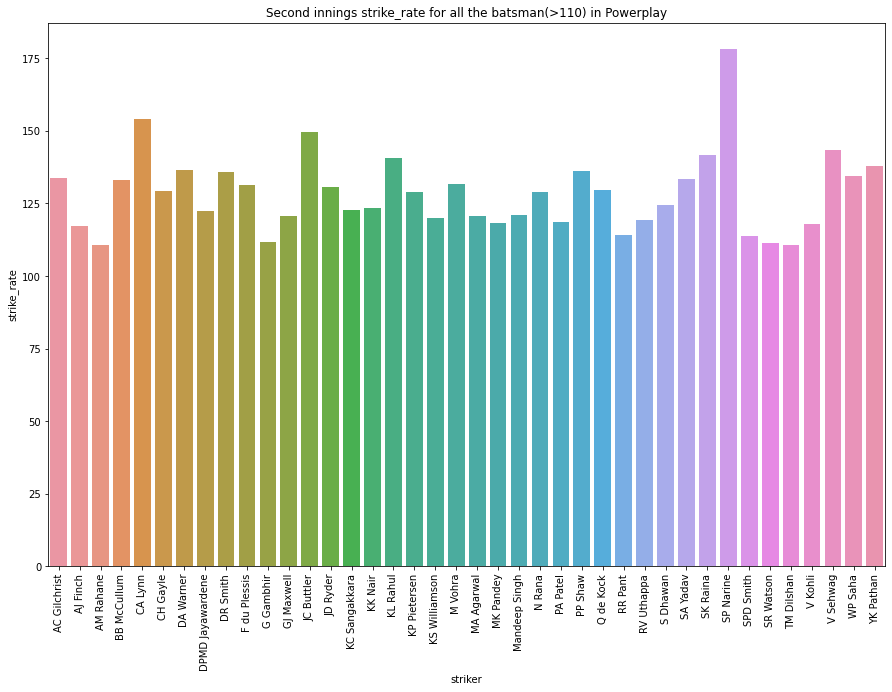

In [ ]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x = 'striker',
            y = 'strike_rate',
            data = prp_bat_pow,
            ci = 0)
ax.set_title('Second innings strike_rate for all the batsman(>110) in Powerplay')
ax.set_xticklabels(prp_bat_pow['striker'], rotation=90)
# Show the plot
plt.show()

In [ ]:
ipldf.count()

In [ ]:
ipldf.describe()

In [ ]:
ipldf['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [ ]:
ipldf.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [ ]:
ipldf['innings'].unique()

array([1, 2, 3, 4, 5, 6])

##Team wise average score with wickets in each innings

###FIRST INNINGS

In [ ]:
df=ipldf.query('ball<6.1 and innings==1')
pow_df=df.groupby(['match_id','batting_team','innings']).agg({'runs_off_bat':'sum','extras':'sum','player_dismissed':'count'})
total_runs=pow_df['runs_off_bat']+pow_df['extras']
pow_df['total_runs']=total_runs
pow_df=pow_df.reset_index()
pow_df

,match_id,batting_team,innings,runs_off_bat,extras,player_dismissed,total_runs
0,335982,Kolkata Knight Riders,1,51,10,1,61
1,335983,Chennai Super Kings,1,50,3,1,53
2,335984,Rajasthan Royals,1,38,2,2,40
3,335985,Mumbai Indians,1,41,6,3,47
4,335986,Deccan Chargers,1,35,4,2,39
...,...,...,...,...,...,...,...
814,1237180,Delhi Capitals,1,63,2,0,65
815,1237181,Delhi Capitals,1,41,0,3,41
816,1254058,Mumbai Indians,1,41,0,1,41
817,1254059,Chennai Super Kings,1,30,3,2,33


In [ ]:
sc_df=pow_df.groupby(['batting_team']).agg({'total_runs':'sum'})
sc_df=sc_df.reset_index()
print(sc_df.head())
wk_df=pow_df.groupby(['batting_team']).agg({'player_dismissed':'sum'})
wk_df=wk_df.reset_index()
print(wk_df.head())
mt_df=pow_df.groupby(['batting_team']).count()
mt_df=mt_df.reset_index()
avg_df=pd.merge(sc_df, mt_df, on='batting_team')

print(wk_df)
avg_df=pd.merge(avg_df,wk_df,on='batting_team')
avg_df=avg_df.rename(columns={'batting_team':'teams','total_runs_x':'total_runs','total_runs_y':'total_matches','player_dismissed_y':'wickets'})
pow_avg_runs=avg_df['total_runs']/avg_df['total_matches']
avg_df['pow_avg_runs']=pow_avg_runs

pow_avg_wickets=avg_df['wickets']/avg_df['total_matches']
avg_df['pow_avg_wickets']=pow_avg_wickets

avg_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DCH','CSK','RR','DD','GL','PBKS','SRH','RPSs','KTK','PW','RPS','DC'],inplace=True)
print(avg_df)


          batting_team  total_runs
0  Chennai Super Kings        4194
1      Deccan Chargers        1841
2       Delhi Capitals         779
3     Delhi Daredevils        3240
4        Gujarat Lions         653
          batting_team  player_dismissed
0  Chennai Super Kings               121
1      Deccan Chargers                62
2       Delhi Capitals                27
3     Delhi Daredevils               124
4        Gujarat Lions                24
                   batting_team  player_dismissed
0           Chennai Super Kings               121
1               Deccan Chargers                62
2                Delhi Capitals                27
3              Delhi Daredevils               124
4                 Gujarat Lions                24
5               Kings XI Punjab               136
6          Kochi Tuskers Kerala                 9
7         Kolkata Knight Riders               143
8                Mumbai Indians               152
9                 Pune Warriors             

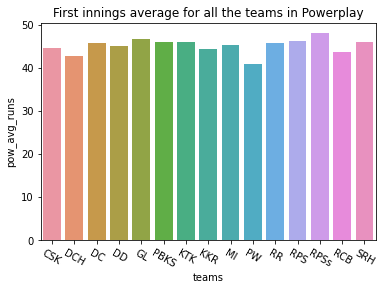

In [ ]:
ax=sns.barplot(x = 'teams',
            y = 'pow_avg_runs',
            data = avg_df,
            ci = 0)
ax.set_title('First innings average for all the teams in Powerplay')
ax.set_xticklabels(avg_df['teams'], rotation=-30)
# Show the plot
plt.show()

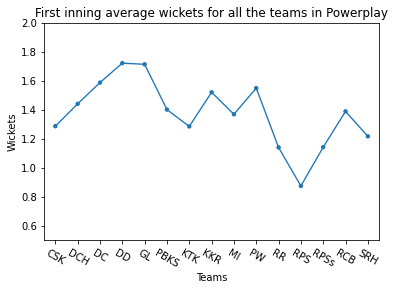

In [ ]:
ax = sns.pointplot(x="teams",y="pow_avg_wickets", scale = 0.5, data=avg_df)
ax.set(xlabel='Teams', ylabel='Wickets')
ax.set(ylim=(0.5, 2))
ax.set_title('First inning average wickets for all the teams in Powerplay')
ax.set_xticklabels(avg_df['teams'], rotation=-30)
plt.show()

###SECOND INNINGS

In [ ]:
df=ipldf.query('ball<6.1 and innings==2')
pow_df2=df.groupby(['match_id','batting_team','innings']).agg({'runs_off_bat':'sum','extras':'sum','player_dismissed':'count'})
total_runs=pow_df2['runs_off_bat']+pow_df2['extras']
pow_df2['total_runs']=total_runs
pow_df2

,,,runs_off_bat,extras,player_dismissed,total_runs
match_id,batting_team,innings,,,,
335982,Royal Challengers Bangalore,2,19,7,4,26
335983,Kings XI Punjab,2,61,2,1,63
335984,Delhi Daredevils,2,53,2,1,55
335985,Royal Challengers Bangalore,2,39,1,1,40
335986,Kolkata Knight Riders,2,21,5,3,26
...,...,...,...,...,...,...
1237180,Sunrisers Hyderabad,2,46,3,3,49
1237181,Mumbai Indians,2,57,4,1,61
1254058,Royal Challengers Bangalore,2,38,8,2,46


In [ ]:
sc_df2=pow_df2.groupby(['batting_team','innings']).agg({'total_runs':'sum'})
wk_df2=pow_df2.groupby(['batting_team','innings']).agg({'player_dismissed':'sum'})
wk_df2.reset_index(level=0, inplace=True)
mt_df2=pow_df2.groupby(['batting_team']).count()
avg_df2=pd.merge(sc_df2, mt_df2, on='batting_team')
avg_df2.reset_index(level=0, inplace=True)
avg_df2=pd.merge(avg_df2,wk_df2,on='batting_team')
avg_df2=avg_df2.rename(columns={'batting_team':'teams','total_runs_x':'total_runs','total_runs_y':'total_matches','player_dismissed_y':'wickets'})
pow_avg_runs=avg_df2['total_runs']/avg_df2['total_matches']
avg_df2['pow_avg_runs']=pow_avg_runs

pow_avg_wickets=avg_df2['wickets']/avg_df2['total_matches']
avg_df2['pow_avg_wickets']=pow_avg_wickets

avg_df2.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DCH','CSK','RR','DD','GL','PBKS','SRH','RPSs','KTK','PW','RPS','DC'],inplace=True)
print(avg_df2)


   teams  total_runs  runs_off_bat  ...  wickets  pow_avg_runs  pow_avg_wickets
0    CSK        3887            85  ...      111     45.729412         1.305882
1    DCH        1576            32  ...       47     49.250000         1.468750
2     DC         846            17  ...       22     49.764706         1.294118
3     DD        4109            89  ...      146     46.168539         1.640449
4     GL         900            16  ...       20     56.250000         1.250000
5   PBKS        4458            93  ...      144     47.935484         1.548387
6    KTK         359             7  ...       14     51.285714         2.000000
7    KKR        4745            99  ...      149     47.929293         1.505051
8     MI        4212            93  ...      129     45.290323         1.387097
9     PW        1076            25  ...       45     43.040000         1.800000
10    RR        3896            89  ...      130     43.775281         1.460674
11   RPS         415             8  ... 

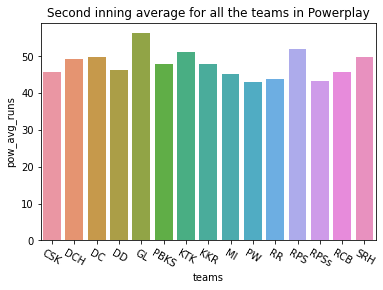

In [ ]:
ax=sns.barplot(x = 'teams',
            y = 'pow_avg_runs',
            data = avg_df2,
            ci = 0)
ax.set_title('Second inning average for all the teams in Powerplay')
ax.set_xticklabels(avg_df2['teams'], rotation=-30)
# Show the plot
plt.show()

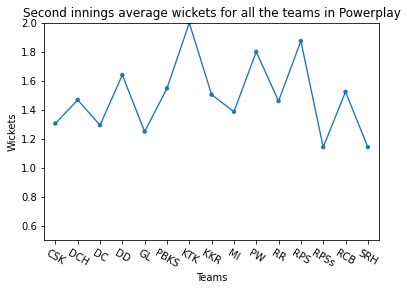

In [ ]:
ax = sns.pointplot(x="teams",y="pow_avg_wickets", scale = 0.5, data=avg_df2)
ax.set(xlabel='Teams', ylabel='Wickets')
ax.set(ylim=(0.5, 2))
ax.set_title('Second innings average wickets for all the teams in Powerplay')
ax.set_xticklabels(avg_df2['teams'], rotation=-30)
plt.show()

##Venue wise average score with wickets in each innings

###FIRST INNING

In [ ]:
df=ipldf.query('ball<6.1 and innings==1')
pow_df_v=df.groupby(['match_id','venue','innings']).agg({'runs_off_bat':'sum','extras':'sum','player_dismissed':'count'})
total_runs=pow_df_v['runs_off_bat']+pow_df_v['extras']
pow_df_v['total_runs']=total_runs


print(pow_df_v)

                                                             runs_off_bat  ...  total_runs
match_id venue                                      innings                ...            
335982   M Chinnaswamy Stadium                      1                  51  ...          61
335983   Punjab Cricket Association Stadium, Mohali 1                  50  ...          53
335984   Feroz Shah Kotla                           1                  38  ...          40
335985   Wankhede Stadium                           1                  41  ...          47
335986   Eden Gardens                               1                  35  ...          39
...                                                                   ...  ...         ...
1237180  Sheikh Zayed Stadium                       1                  63  ...          65
1237181  Dubai International Cricket Stadium        1                  41  ...          41
1254058  MA Chidambaram Stadium, Chepauk, Chennai   1                  41  ...          41

In [ ]:
sc_df_v=pow_df_v.groupby(['venue']).agg({'total_runs':'sum'})
wk_df_v=pow_df_v.groupby(['venue']).agg({'player_dismissed':'sum'})
wk_df_v.reset_index(level=0, inplace=True)
mt_df_v=pow_df_v.groupby(['venue']).count()
avg_df_v=pd.merge(sc_df_v, mt_df_v, on='venue')
avg_df_v.reset_index(level=0, inplace=True)
avg_df_v=pd.merge(avg_df_v,wk_df_v,on='venue')
avg_df_v=avg_df_v.rename(columns={'total_runs_x':'total_runs','total_runs_y':'total_matches','player_dismissed_y':'wickets'})
pow_avg_runs_v=avg_df_v['total_runs']/avg_df_v['total_matches']
avg_df_v['pow_avg_runs']=pow_avg_runs_v

pow_avg_wickets_v=avg_df_v['wickets']/avg_df_v['total_matches']
avg_df_v['pow_avg_wickets']=pow_avg_wickets_v

print(avg_df_v)


                                                venue  ...  pow_avg_wickets
0                                Arun Jaitley Stadium  ...         1.571429
1                                    Barabati Stadium  ...         1.857143
2                                   Brabourne Stadium  ...         0.818182
3                                        Buffalo Park  ...         1.666667
4                               De Beers Diamond Oval  ...         1.333333
5                          Dr DY Patil Sports Academy  ...         2.294118
6   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...  ...         1.230769
7                 Dubai International Cricket Stadium  ...         1.151515
8                                        Eden Gardens  ...         1.324675
9                                    Feroz Shah Kotla  ...         1.466667
10                                         Green Park  ...         1.750000
11       Himachal Pradesh Cricket Association Stadium  ...         1.333333
12          

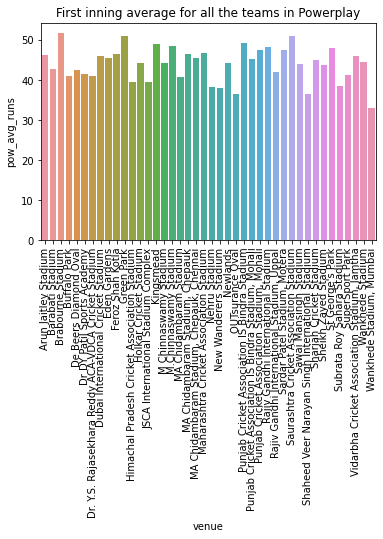

In [ ]:
ax=sns.barplot(x = 'venue',
            y = 'pow_avg_runs',
            data = avg_df_v,
            ci = 0)
ax.set_title('First inning average for all the teams in Powerplay')
ax.set_xticklabels(avg_df_v['venue'], rotation= 90)
# Show the plot
plt.show()

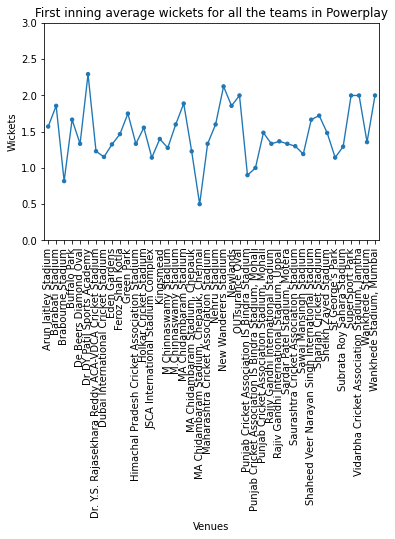

In [ ]:
ax = sns.pointplot(x="venue",y="pow_avg_wickets", scale = 0.5, data=avg_df_v)
ax.set(xlabel='Venues', ylabel='Wickets')
ax.set(ylim=(0, 3))
ax.set_title('First inning average wickets for all the teams in Powerplay')
ax.set_xticklabels(avg_df_v['venue'], rotation=90)
plt.show()

###SECOND INNING

In [ ]:
df=ipldf.query('ball<6.1 and innings==2')
pow_df_v2=df.groupby(['match_id','venue','innings']).agg({'runs_off_bat':'sum','extras':'sum','player_dismissed':'count'})
total_runs=pow_df_v2['runs_off_bat']+pow_df_v2['extras']
pow_df_v2['total_runs']=total_runs


print(pow_df_v2)

                                                             runs_off_bat  ...  total_runs
match_id venue                                      innings                ...            
335982   M Chinnaswamy Stadium                      2                  19  ...          26
335983   Punjab Cricket Association Stadium, Mohali 2                  61  ...          63
335984   Feroz Shah Kotla                           2                  53  ...          55
335985   Wankhede Stadium                           2                  39  ...          40
335986   Eden Gardens                               2                  21  ...          26
...                                                                   ...  ...         ...
1237180  Sheikh Zayed Stadium                       2                  46  ...          49
1237181  Dubai International Cricket Stadium        2                  57  ...          61
1254058  MA Chidambaram Stadium, Chepauk, Chennai   2                  38  ...          46

In [ ]:
sc_df_v2=pow_df_v2.groupby(['venue']).agg({'total_runs':'sum'})
wk_df_v2=pow_df_v2.groupby(['venue']).agg({'player_dismissed':'sum'})
wk_df_v2.reset_index(level=0, inplace=True)
mt_df_v2=pow_df_v2.groupby(['venue']).count()
avg_df_v2=pd.merge(sc_df_v2, mt_df_v2, on='venue')
avg_df_v2.reset_index(level=0, inplace=True)
avg_df_v2=pd.merge(avg_df_v2,wk_df_v2,on='venue')
avg_df_v2=avg_df_v2.rename(columns={'total_runs_x':'total_runs','total_runs_y':'total_matches','player_dismissed_y':'wickets'})
pow_avg_runs_v2=avg_df_v2['total_runs']/avg_df_v2['total_matches']
avg_df_v2['pow_avg_runs']=pow_avg_runs_v2

pow_avg_wickets_v2=avg_df_v2['wickets']/avg_df_v2['total_matches']
avg_df_v2['pow_avg_wickets']=pow_avg_wickets_v2
print(avg_df_v2)


                                                venue  ...  pow_avg_wickets
0                                Arun Jaitley Stadium  ...         1.214286
1                                    Barabati Stadium  ...         1.000000
2                                   Brabourne Stadium  ...         1.090909
3                                        Buffalo Park  ...         1.666667
4                               De Beers Diamond Oval  ...         2.000000
5                          Dr DY Patil Sports Academy  ...         1.058824
6   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...  ...         1.307692
7                 Dubai International Cricket Stadium  ...         1.878788
8                                        Eden Gardens  ...         1.506494
9                                    Feroz Shah Kotla  ...         1.593220
10                                         Green Park  ...         2.000000
11       Himachal Pradesh Cricket Association Stadium  ...         1.444444
12          

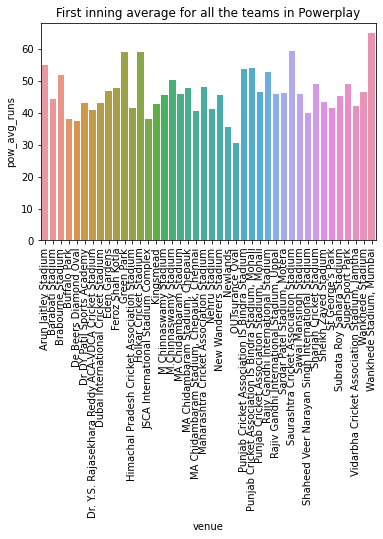

In [ ]:
ax=sns.barplot(x = 'venue',
            y = 'pow_avg_runs',
            data = avg_df_v2,
            ci = 0)
ax.set_title('First inning average for all the teams in Powerplay')
ax.set_xticklabels(avg_df_v2['venue'], rotation= 90)
# Show the plot
plt.show()

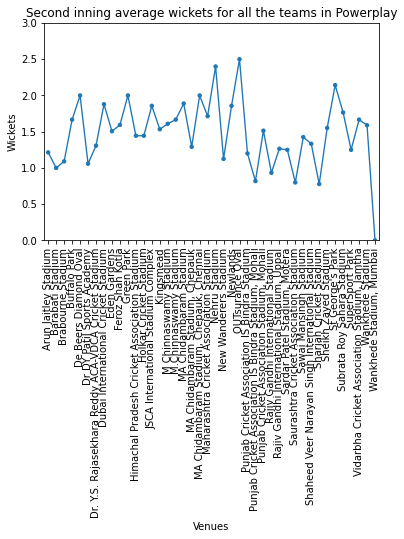

In [ ]:
ax = sns.pointplot(x="venue",y="pow_avg_wickets", scale = 0.5, data=avg_df_v2)
ax.set(xlabel='Venues', ylabel='Wickets')
ax.set(ylim=(0, 3))
ax.set_title('Second inning average wickets for all the teams in Powerplay')
ax.set_xticklabels(avg_df_v2['venue'], rotation=90)
plt.show()